# Wage data analysis

## 1. Loading prerequisites
#### 1.1 Libraries

In [1]:
suppressWarnings(
    {
        if(!require(ISLR)){
            install.packages("ISLR")
        }
        if(!require(GGally)){
            install.packages("GGally")
        }
        if(!require(dplyr)){
            install.packages("dplyr")
        }
        if(!require(ggplot2)){
            install.packages("ggplot2")
        }
        if(!require(caret)){
            install.packages("caret")
        }
        library(ISLR)
        library(dplyr)
        library(ggplot2)
        library(caret)
    }
)
options(repr.plot.width=6, repr.plot.height=4)

Loading required package: ISLR
Loading required package: GGally
Loading required package: ggplot2
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: caret
Loading required package: lattice


#### 1.2 Data

In [2]:
data(Wage)
summary(Wage)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

## 2. Modelling
#### 2.1 Data splicing

In [3]:
inTrain = createDataPartition(y = Wage$wage, p = 0.75, list = F)
train = Wage[inTrain,]
test = Wage[-inTrain,]
dim(train); dim(test)

[1] 2251   11

[1] 749  11

In [4]:
names(train)

[1] "year"       "age"        "maritl"     "race"       "education" 
 [6] "region"     "jobclass"   "health"     "health_ins" "logwage"   
[11] "wage"

#### 2.2 Feature plot

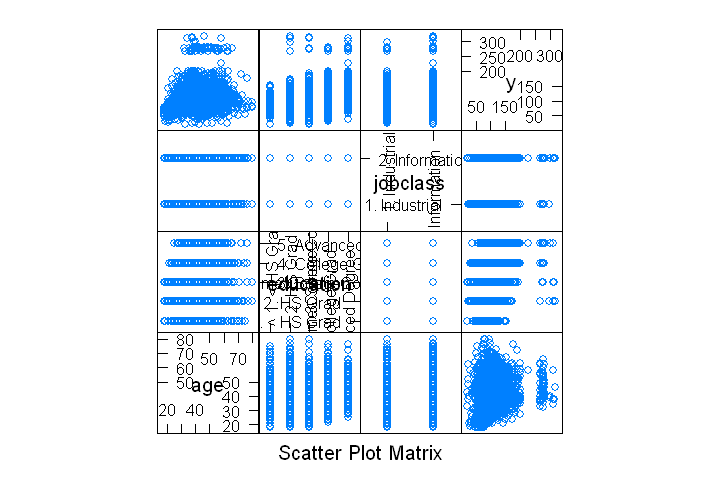

In [5]:
featurePlot(x = train[,c("age","education","jobclass")], y = train$wage, plot = "pairs")

#### 2.3 Wage analysis
##### 2.3.1 Jitter analysis

In [6]:
g = ggplot(data = train) 

##### 2.3.2 jobClass 

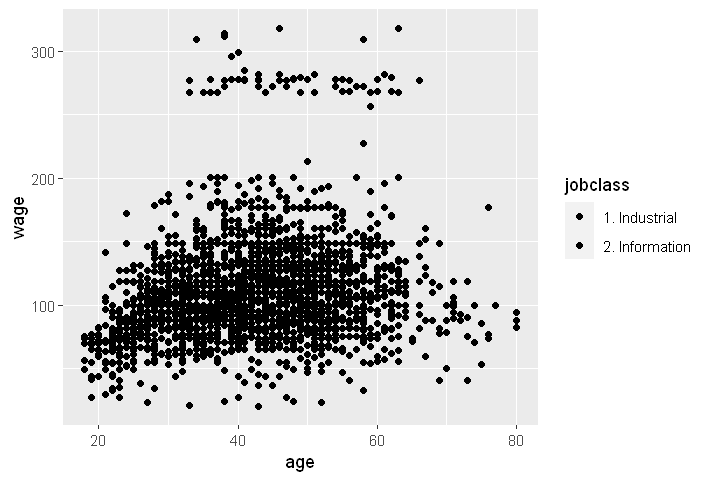

In [7]:
g + geom_point(aes(x = age, y = wage, fill = jobclass))

##### 2.3.3 eduction

ERROR while rich displaying an object: Error: stat_smooth requires the following missing aesthetics: x and y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.defaul

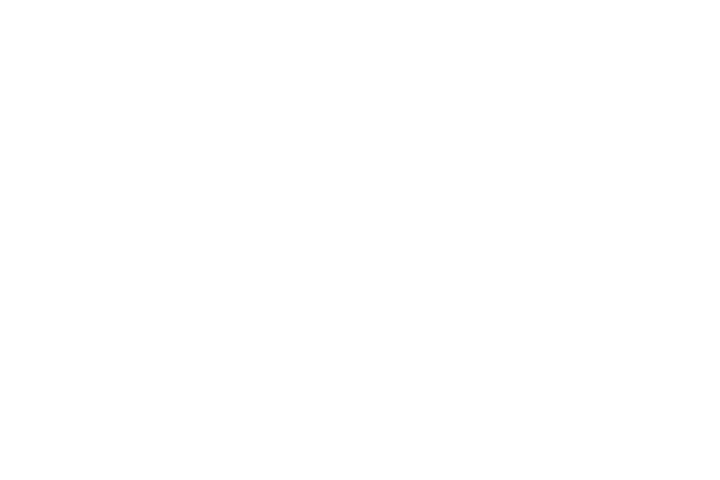

In [8]:
g + geom_point(aes(x = age, y = wage, fill = education)) + geom_smooth(formula = y~x, method = "lm")

##### 2.3.4 binning wage
Creating discrete factors from the wage parameter for analysis

In [11]:
cutWage = cut2(train$wage, g = 3)
table(cutWage)

ERROR: Error in cut2(train$wage, g = 3): could not find function "cut2"


In [10]:
p1 = g + geom_boxplot(aes(x = cutWage, y = age, fill = cutWage))
p2 = g + geom_boxplot(aes(x = cutWage, y = age, fill = cutWage)) + geom_jitter(aes(x = cutWage, y = age, fill = cutWage))
grid.arrange(p1, p2, ncol = 2)

ERROR: Error in grid.arrange(p1, p2, ncol = 2): could not find function "grid.arrange"


In [ ]:
table(cutWage, train$jobClass)

##### 2.3.5 jobClass wage density plot

In [ ]:
g + geom_density(aes(x = wage, fill = eduction))